In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings

In [2]:
# Find Directory and Folders
Diri = "/glade/scratch/whimkao/MPAS/Forecast_Q2/"
#
# List Files
Files = os.listdir(Diri)
Files

['diag.Q2.2021-08-27_09.00.00.nc',
 'FILE:2021-08-28_00',
 'FILE:2021-08-26_00',
 'diag.Q2.2021-08-29_18.00.00.nc',
 'FILE:2021-08-28_12',
 'history.Q2.2021-08-28_15.00.00.nc',
 'log.atmosphere.0028.err',
 'diag.Q2.2021-08-29_21.00.00.nc',
 'log.atmosphere.0075.err',
 'init_atmosphere_model',
 'log.atmosphere.0047.err',
 'log.atmosphere.0076.err',
 'VERSION',
 'diag.Q2.2021-08-31_18.00.00.nc',
 'log.atmosphere.0031.err',
 'log.atmosphere.0072.err',
 'log.atmosphere.0067.err',
 'log.atmosphere.0083.err',
 'diag.Q2.2021-08-27_18.00.00.nc',
 'log.atmosphere.0056.err',
 'history.Q2.2021-08-31_06.00.00.nc',
 'diag.Q2.2021-08-29_12.00.00.nc',
 'diag.Q2.2021-08-27_06.00.00.nc',
 'log.atmosphere.0027.err',
 'diag.Q2.2021-08-27_03.00.00.nc',
 'history.Q2.2021-08-31_15.00.00.nc',
 'log.atmosphere.0013.err',
 'history.Q2.2021-08-28_21.00.00.nc',
 'sub-init.sh',
 'log.atmosphere.0064.err',
 'history.Q2.2021-08-29_09.00.00.nc',
 'diag.Q2.2021-08-28_12.00.00.nc',
 'history.Q2.2021-08-31_18.00.00.nc'

In [3]:
xr.open_dataset(Diri + 'history.Q2.2021-08-27_00.00.00.nc')

<xarray.Dataset>
Dimensions:                 (TWO: 2, Time: 1, maxEdges: 10, maxEdges2: 20, nCells: 655362, nEdges: 1966080, nMonths: 12, nOznLevels: 59, nSoilLevels: 4, nVertLevels: 41, nVertLevelsP1: 42, nVertices: 1310720, vertexDegree: 3)
Dimensions without coordinates: TWO, Time, maxEdges, maxEdges2, nCells, nEdges, nMonths, nOznLevels, nSoilLevels, nVertLevels, nVertLevelsP1, nVertices, vertexDegree
Data variables:
    qv                      (Time, nCells, nVertLevels) float32 ...
    qc                      (Time, nCells, nVertLevels) float32 ...
    qr                      (Time, nCells, nVertLevels) float32 ...
    qi                      (Time, nCells, nVertLevels) float32 ...
    qs                      (Time, nCells, nVertLevels) float32 ...
    qg                      (Time, nCells, nVertLevels) float32 ...
    latCell                 (nCells) float32 ...
    lonCell                 (nCells) float32 ...
    xCell                   (nCells) float32 ...
    yCell                   (nCells) float32 ...
    zCell                   (nCells) float32 ...
    indexToCellID           (nCells) int32 ...
    latEdge                 (nEdges) float32 ...
    lonEdge                 (nEdges) float32 ...
    xEdge                   (nEdges) float32 ...
    yEdge                   (nEdges) float32 ...
    zEdge                   (nEdges) float32 ...
    indexToEdgeID           (nEdges) int32 ...
    latVertex               (nVertices) float32 ...
    lonVertex               (nVertices) float32 ...
    xVertex                 (nVertices) float32 ...
    yVertex                 (nVertices) float32 ...
    zVertex                 (nVertices) float32 ...
    indexToVertexID         (nVertices) int32 ...
    cellsOnEdge             (nEdges, TWO) int32 ...
    nEdgesOnCell            (nCells) int32 ...
    nEdgesOnEdge            (nEdges) int32 ...
    edgesOnCell             (nCells, maxEdges) int32 ...
    edgesOnEdge             (nEdges, maxEdges2) int32 ...
    weightsOnEdge           (nEdges, maxEdges2) float32 ...
    dvEdge                  (nEdges) float32 ...
    dcEdge                  (nEdges) float32 ...
    angleEdge               (nEdges) float32 ...
    areaCell                (nCells) float32 ...
    areaTriangle            (nVertices) float32 ...
    cellsOnCell             (nCells, maxEdges) int32 ...
    verticesOnCell          (nCells, maxEdges) int32 ...
    verticesOnEdge          (nEdges, TWO) int32 ...
    edgesOnVertex           (nVertices, vertexDegree) int32 ...
    cellsOnVertex           (nVertices, vertexDegree) int32 ...
    kiteAreasOnVertex       (nVertices, vertexDegree) float32 ...
    meshDensity             (nCells) float32 ...
    zgrid                   (nCells, nVertLevelsP1) float32 ...
    fzm                     (nVertLevels) float32 ...
    fzp                     (nVertLevels) float32 ...
    zz                      (nCells, nVertLevels) float32 ...
    initial_time            |S64 ...
    xtime                   (Time) |S64 ...
    u                       (Time, nEdges, nVertLevels) float32 ...
    w                       (Time, nCells, nVertLevelsP1) float32 ...
    pressure                (Time, nCells, nVertLevels) float32 ...
    surface_pressure        (Time, nCells) float32 ...
    rho                     (Time, nCells, nVertLevels) float32 ...
    theta                   (Time, nCells, nVertLevels) float32 ...
    relhum                  (Time, nCells, nVertLevels) float32 ...
    divergence              (Time, nCells, nVertLevels) float32 ...
    vorticity               (Time, nVertices, nVertLevels) float32 ...
    ke                      (Time, nCells, nVertLevels) float32 ...
    uReconstructZonal       (Time, nCells, nVertLevels) float32 ...
    uReconstructMeridional  (Time, nCells, nVertLevels) float32 ...
    ertel_pv                (Time, nCells, nVertLevels) float32 ...
    u_pv                    (Time, nCells) float32 ...
    v_pv                    (Time, nCells) float3

In [4]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files
Longitude_File = numpy.array((xr.open_dataset(Diri + 'history.Q2.2021-08-27_00.00.00.nc').lonCell) * 360 / (2*numpy.pi))
Latitude_File = numpy.array((xr.open_dataset(Diri + 'history.Q2.2021-08-27_00.00.00.nc').latCell) * 360 / (2*numpy.pi))
Sfc_Pressure_File = numpy.array(xr.open_dataset(Diri + 'history.Q2.2021-08-27_00.00.00.nc').surface_pressure[0,:])
Altitude_File = numpy.array(xr.open_dataset(Diri + 'history.Q2.2021-08-27_00.00.00.nc').zgrid[:,0])

In [5]:
Sfc_Pressure_File

array([100441.41 , 101486.625,  97538.61 , ..., 100717.4  , 100719.94 ,
       100736.75 ], dtype=float32)

In [6]:
# Keep Data Within Target Area
Longitude_List = []
Latitude_List = []
Sfc_Pressure_List = []
Altitude_List = []
for i in range(len(Latitude_File)):
    if Latitude_File[i] >= 15 and Latitude_File[i] <= 40 and Longitude_File[i] >=360-98 and Longitude_File[i] < 360-75:
        Longitude_List.append(Longitude_File[i])
        Latitude_List.append(Latitude_File[i])
        Sfc_Pressure_List.append(Sfc_Pressure_File[i])
        Altitude_List.append(Altitude_File[i])
Longitude_NATL = numpy.array(Longitude_List)
Latitude_NATL = numpy.array(Latitude_List)
Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
Altitude_NATL = numpy.array(Altitude_List)

In [7]:
# Estimate Sea Level Pressure Using Barometric Equation
Scale_Height = 8500
SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
print (SLP_NATL)

[1013.8274  1011.62244 1011.8196  ... 1020.0639  1016.6898  1020.997  ]


In [8]:
# Find Pressure and Lat Lon of Mininum SLP Location
Min_SLP_Index = numpy.argmin(SLP_NATL)
print (SLP_NATL[Min_SLP_Index])
print (Longitude_NATL[Min_SLP_Index] - 360)
print (Latitude_NATL[Min_SLP_Index])

1002.8084
-79.823974609375
18.924719


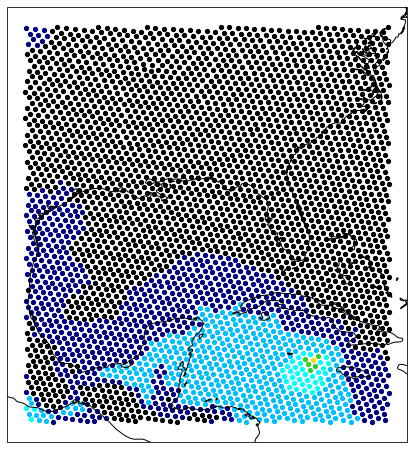

In [9]:
# Create Colour List For Labelling Sea Level Pressure
Colour_List = []
for i in range(len(SLP_NATL)):
    if SLP_NATL[i] >= 1012:
        Colour_List.append('black')
    elif SLP_NATL[i] >= 1010:
        Colour_List.append('navy')
    elif SLP_NATL[i] >= 1008:
        Colour_List.append('deepskyblue')
    elif SLP_NATL[i] >= 1006:
        Colour_List.append('cyan')
    elif SLP_NATL[i] >= 1004:
        Colour_List.append('limegreen')
    else:
        Colour_List.append('gold')
#
# Plot Sea Level Pressure Map
Fig = pyplot.figure(figsize=(15,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
for i in range(len(SLP_NATL)):
    pyplot.scatter(Longitude_NATL[i], Latitude_NATL[i], c=Colour_List[i], s=18)
#pyplot.xlim(360-95,360-80)
#pyplot.ylim(20,35)

In [10]:
# Create Time Step List
Time_Step_List = []
for i in range(5):
    for j in range(8):
        if j <= 3:
            Time_Step = "2021-08-"+str(i+27)+"_0"+str(j*3)+".00.00"
        else:
            Time_Step = "2021-08-"+str(i+27)+"_"+str(j*3)+".00.00"
        Time_Step_List.append(Time_Step)
Time_Step = "2021-09-01_00.00.00"
Time_Step_List.append(Time_Step)
print (Time_Step_List)

['2021-08-27_00.00.00', '2021-08-27_03.00.00', '2021-08-27_06.00.00', '2021-08-27_09.00.00', '2021-08-27_12.00.00', '2021-08-27_15.00.00', '2021-08-27_18.00.00', '2021-08-27_21.00.00', '2021-08-28_00.00.00', '2021-08-28_03.00.00', '2021-08-28_06.00.00', '2021-08-28_09.00.00', '2021-08-28_12.00.00', '2021-08-28_15.00.00', '2021-08-28_18.00.00', '2021-08-28_21.00.00', '2021-08-29_00.00.00', '2021-08-29_03.00.00', '2021-08-29_06.00.00', '2021-08-29_09.00.00', '2021-08-29_12.00.00', '2021-08-29_15.00.00', '2021-08-29_18.00.00', '2021-08-29_21.00.00', '2021-08-30_00.00.00', '2021-08-30_03.00.00', '2021-08-30_06.00.00', '2021-08-30_09.00.00', '2021-08-30_12.00.00', '2021-08-30_15.00.00', '2021-08-30_18.00.00', '2021-08-30_21.00.00', '2021-08-31_00.00.00', '2021-08-31_03.00.00', '2021-08-31_06.00.00', '2021-08-31_09.00.00', '2021-08-31_12.00.00', '2021-08-31_15.00.00', '2021-08-31_18.00.00', '2021-08-31_21.00.00', '2021-09-01_00.00.00']


In [11]:
# Create Empty Arrays to Store Info
Min_SLP = numpy.zeros(len(Time_Step_List))
Min_SLP_Lon_Lat = numpy.zeros((2, len(Time_Step_List)))

In [12]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Time Step
for i in range(len(Time_Step_List)):
    File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
    Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Sfc_Pressure_List = []
    Altitude_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 40 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Sfc_Pressure_List.append(Sfc_Pressure_File[k])
            Altitude_List.append(Altitude_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
    Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
    Scale_Height = 8500
    SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
#
# Find Pressure and Lat Lon of Mininum SLP Location
    Min_SLP_Index = numpy.argmin(SLP_NATL)
    Min_SLP[i] = SLP_NATL[Min_SLP_Index]
    Min_SLP_Lon_Lat[0][i] = Longitude_NATL[Min_SLP_Index] - 360
    Min_SLP_Lon_Lat[1][i] = Latitude_NATL[Min_SLP_Index]
print (Min_SLP)
print (Min_SLP_Lon_Lat)

[1002.80841064 1004.71234131 1003.18200684 1001.33868408 1001.8371582
 1000.70404053 1000.76556396  999.48614502 1000.51000977  998.73718262
  997.71075439  994.29992676  996.0524292   995.59967041  997.8092041
  996.52593994  996.20458984  993.86486816  992.38171387  990.09759521
  988.71875     985.22338867  985.04046631  981.11914062  981.87548828
  978.55609131  978.43182373  978.35522461  977.66015625  982.40460205
  986.75891113  987.63299561  989.86383057  990.12036133  990.01580811
  990.94775391  991.8873291   992.71789551  993.38806152  992.17016602
  992.29321289]
[[-79.82397461 -80.30441284 -80.93548584 -81.56668091 -82.04611206
  -82.67764282 -83.15704346 -83.31008911 -83.78967285 -84.09872437
  -84.2545166  -85.04962158 -85.36746216 -86.49377441 -86.97756958
  -87.625      -88.44088745 -88.92800903 -89.26409912 -89.92373657
  -90.09524536 -90.76019287 -91.11077881 -91.60552979 -91.78363037
  -91.96298218 -92.14364624 -92.32559204 -92.5088501  -92.69342041
  -92.8793335  -

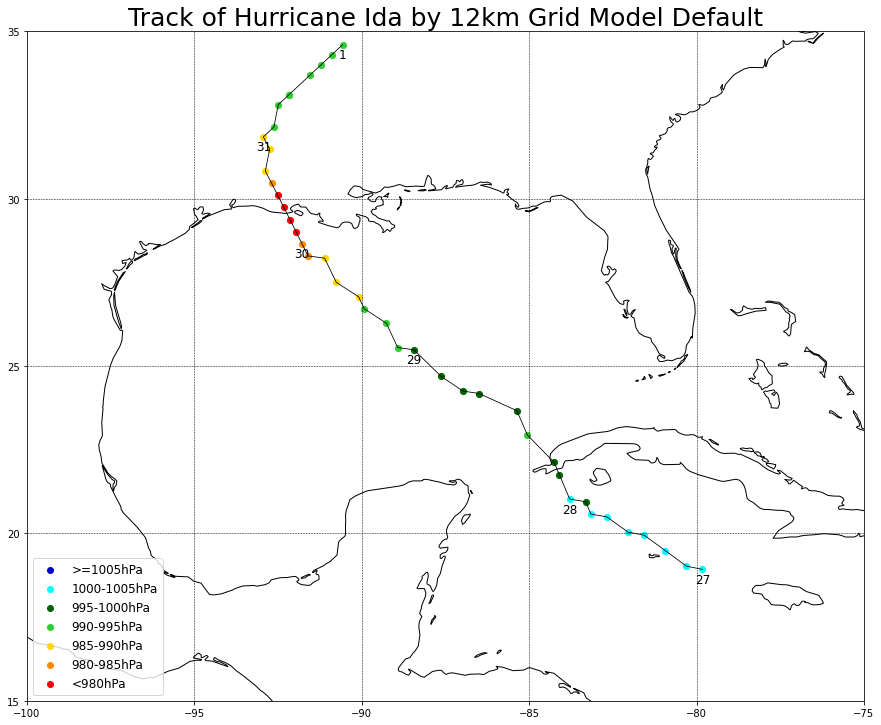

In [13]:
# Create Colour List For Labelling Sea Level Pressure
Colour_List = []
Colours = ['mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red']
Colour_Labels = ['>=1005hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', '985-990hPa', '980-985hPa', '<980hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1005:
        Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1000:
        Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 995:
        Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 990:
        Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 985:
        Colour_List.append(Colours[4])
    elif Min_SLP[i] >= 980:
        Colour_List.append(Colours[5])
    else:
        Colour_List.append(Colours[6])
#
# Plot Sea Level Pressure Map
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8)
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Colour_List[i], s=38)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':12}, color='black')
    if i == 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(1), ha='center', va='center', \
        fontdict={'size':12}, color='black')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,35)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by 12km Grid Model Default', fontsize=25)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q2_Model.png', bbox_inches='tight')

In [14]:
# Create Colour List For Labelling Sea Level Pressure
Model_Colour_List = []
Colours = ['black', 'navy', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1010:
        Model_Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1005:
        Model_Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 1000:
        Model_Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 990:
        Model_Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 980:
        Model_Colour_List.append(Colours[4])
    elif Min_SLP[i] >= 965:
        Model_Colour_List.append(Colours[5])
    elif Min_SLP[i] >= 950:
        Model_Colour_List.append(Colours[6])
    elif Min_SLP[i] >= 930:
        Model_Colour_List.append(Colours[7])
    else:
        Model_Colour_List.append(Colours[6])

In [15]:
Ida_Best_Track = pandas.read_csv("Hurricane_Ida_BST.csv")
BST_SLP = numpy.array(Ida_Best_Track["Pressure"])
BST_Lat = numpy.array(Ida_Best_Track["Lat"])
BST_Lon = numpy.array(Ida_Best_Track["Lon"])
BST_SLP

array([1004, 1002,  996,  987,  989,  987,  986,  976,  967,  950,  929,
        932,  944,  978,  992,  996,  996,  996,  996,  999, 1000])

In [16]:
Q1_Ida = pandas.read_csv("Q1_Ida.csv")
Q1_SLP = numpy.array(Q1_Ida["Pressure"])
Q1_Lat = numpy.array(Q1_Ida["Lat"])
Q1_Lon = numpy.array(Q1_Ida["Lon"])
Q1_SLP

array([1005.72359375, 1007.53882813, 1006.8778125 , 1005.55195312,
       1006.40523437, 1007.56132813, 1007.49984375, 1006.72328125,
       1007.670625  , 1009.13054688, 1008.61039063, 1007.93960938,
       1008.78742187, 1009.80210937, 1009.81921875, 1009.06015625,
       1009.2046875 , 1009.81929687, 1010.31054688, 1009.37546875,
       1009.20945312, 1009.81257812, 1008.73117187, 1007.93898438,
       1007.34046875, 1007.61398437, 1007.10023438, 1005.58851563,
       1004.69476562, 1004.40492188, 1003.271875  , 1002.55585937,
       1001.95609375, 1003.09601562, 1003.7034375 , 1002.14726563,
       1002.01109375, 1002.71679688, 1002.93171875, 1002.64953125,
       1002.84976563])

In [17]:
# Create Colour List For Labelling Sea Level Pressure
BST_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(BST_SLP)):
    if BST_SLP[i] >= 1010:
        BST_Colour_List.append(Colours[0])
    elif BST_SLP[i] >= 1005:
        BST_Colour_List.append(Colours[1])
    elif BST_SLP[i] >= 1000:
        BST_Colour_List.append(Colours[2])
    elif BST_SLP[i] >= 990:
        BST_Colour_List.append(Colours[3])
    elif BST_SLP[i] >= 980:
        BST_Colour_List.append(Colours[4])
    elif BST_SLP[i] >= 965:
        BST_Colour_List.append(Colours[5])
    elif BST_SLP[i] >= 950:
        BST_Colour_List.append(Colours[6])
    elif BST_SLP[i] >= 930:
        BST_Colour_List.append(Colours[7])
    else:
        BST_Colour_List.append(Colours[8])

In [18]:
# Create Colour List For Labelling Sea Level Pressure
Q1_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Q1_SLP)):
    if Q1_SLP[i] >= 1010:
        Q1_Colour_List.append(Colours[0])
    elif Q1_SLP[i] >= 1005:
        Q1_Colour_List.append(Colours[1])
    elif Q1_SLP[i] >= 1000:
        Q1_Colour_List.append(Colours[2])
    elif Q1_SLP[i] >= 990:
        Q1_Colour_List.append(Colours[3])
    elif Q1_SLP[i] >= 980:
        Q1_Colour_List.append(Colours[4])
    elif Q1_SLP[i] >= 965:
        Q1_Colour_List.append(Colours[5])
    elif Q1_SLP[i] >= 950:
        Q1_Colour_List.append(Colours[6])
    elif Q1_SLP[i] >= 930:
        Q1_Colour_List.append(Colours[7])
    else:
        Q1_Colour_List.append(Colours[8])

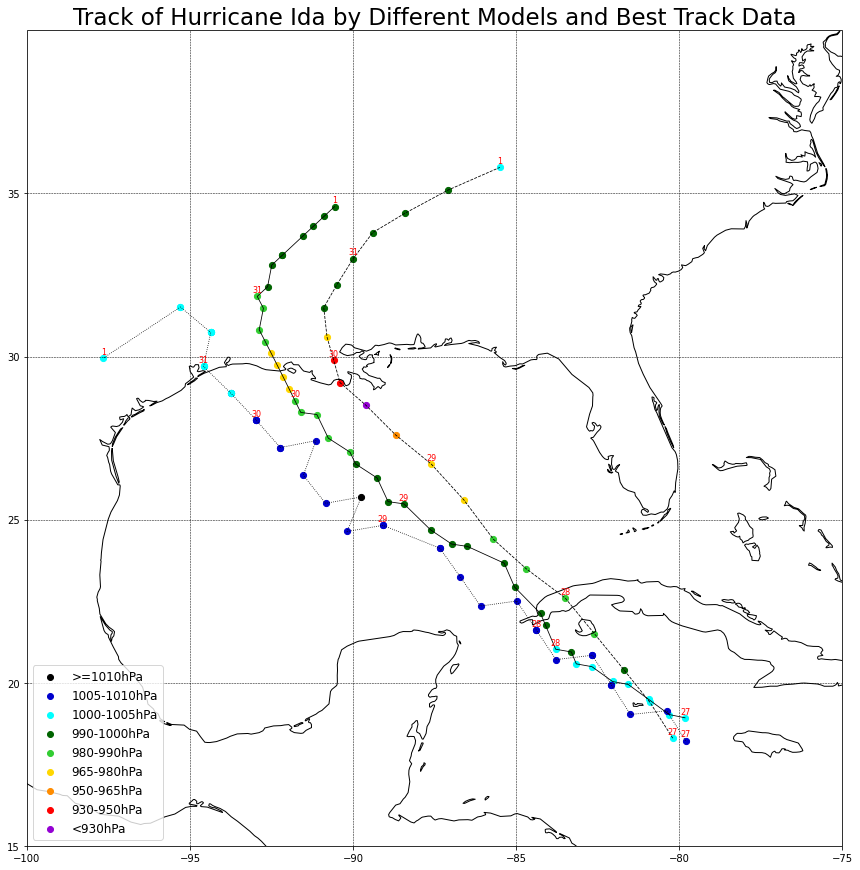

In [19]:
# Plot Ida Track
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
#
# Plot Model SLP
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8, linestyle='-')
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Model_Colour_List[i], s=38)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]+0.2, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Plot Q1 SLP
pyplot.plot(Q1_Lon, Q1_Lat, c='black', linewidth=0.8, linestyle=':')
for i in range(len(Q1_SLP)):
    pyplot.scatter(Q1_Lon[i], Q1_Lat[i], c=Q1_Colour_List[i], s=38)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Q1_Lon[i], Q1_Lat[i]+0.2, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 40:
        Axis.text(Q1_Lon[i], Q1_Lat[i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Plot Ida Best Track SLP
pyplot.plot(BST_Lon, BST_Lat, c='black', linewidth=0.8, linestyle='--')
for i in range(len(BST_SLP)):
    pyplot.scatter(BST_Lon[i], BST_Lat[i], c=BST_Colour_List[i], s=38)
# Label Points
    if i % 4 == 0 and i != 20:
        Axis.text(BST_Lon[i], BST_Lat[i]+0.2, str(int(i/4+27)), ha='center', va='center', \
        fontdict={'size':8}, color='red')
    if i == 20:
        Axis.text(BST_Lon[i], BST_Lat[i]+0.2, str(1), ha='center', va='center', \
        fontdict={'size':8}, color='red')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,40)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by Different Models and Best Track Data', fontsize=23)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q2_Compare.png', bbox_inches='tight')

In [20]:
# Create DataFrame to Store Data
Q2_DF = pandas.DataFrame({"Time": Time_Step_List, "Pressure": Min_SLP, \
"Lon": Min_SLP_Lon_Lat[0], "Lat": Min_SLP_Lon_Lat[1]})
Q2_DF

,Time,Pressure,Lon,Lat
0,2021-08-27_00.00.00,1002.808411,-79.823975,18.924719
1,2021-08-27_03.00.00,1004.712341,-80.304413,19.022711
2,2021-08-27_06.00.00,1003.182007,-80.935486,19.486996
3,2021-08-27_09.00.00,1001.338684,-81.566681,19.947590
4,2021-08-27_12.00.00,1001.837158,-82.046112,20.037718
5,2021-08-27_15.00.00,1000.704041,-82.677643,20.492136
6,2021-08-27_18.00.00,1000.765564,-83.157043,20.578018
7,2021-08-27_21.00.00,999.486145,-83.310089,20.943485
8,2021-08-28_00.00.00,1000.510010,-83.789673,21.026964
9,2021-08-28_03.00.00,998.737183,-84.098724,21.757311


In [21]:
# Output Data File
Filename_Q2 = "Q2_Ida.csv"
Q2_DF.to_csv(Filename_Q2)

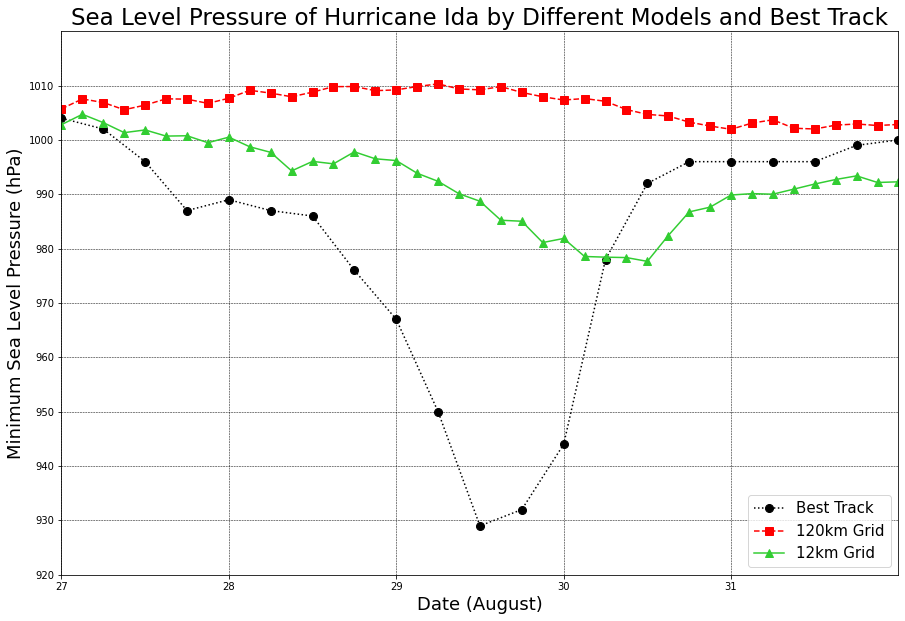

In [22]:
# Plot SLP Graph
Fig = pyplot.figure(figsize=(15,10))
Axis = Fig.add_subplot(1,1,1)
Time_List = numpy.arange(27,32.125,0.125)
Time_List_2 = numpy.arange(27,32.25,0.25)
pyplot.plot(Time_List_2, BST_SLP, linewidth=1.5, marker='o', markersize=8, color='black', linestyle=':', label='Best Track')
pyplot.plot(Time_List, Q1_SLP, linewidth=1.5, marker='s', markersize=8, color='red', linestyle='--', label='120km Grid')
pyplot.plot(Time_List, Min_SLP, linewidth=1.5, marker='^', markersize=8, color='limegreen', linestyle='-', label='12km Grid')
#
# Add Gridlines
pyplot.xlim(27,32)
pyplot.ylim(920,1020)
x_Axis = numpy.arange(27,32,1)
y_Axis = numpy.arange(920,1020,10)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = pyplot.grid(linewidth=0.5, color='black', linestyle='--')
pyplot.xlabel('Date (August)', fontsize=18)
pyplot.ylabel('Minimum Sea Level Pressure (hPa)', fontsize=18)
pyplot.title('Sea Level Pressure of Hurricane Ida by Different Models and Best Track', fontsize=23)
#
# Add Legend
pyplot.legend(loc=4, fontsize=15)

In [23]:
File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[25] + '.nc')
File

<xarray.Dataset>
Dimensions:                 (TWO: 2, Time: 1, maxEdges: 10, maxEdges2: 20, nCells: 655362, nEdges: 1966080, nMonths: 12, nOznLevels: 59, nSoilLevels: 4, nVertLevels: 41, nVertLevelsP1: 42, nVertices: 1310720, vertexDegree: 3)
Dimensions without coordinates: TWO, Time, maxEdges, maxEdges2, nCells, nEdges, nMonths, nOznLevels, nSoilLevels, nVertLevels, nVertLevelsP1, nVertices, vertexDegree
Data variables:
    qv                      (Time, nCells, nVertLevels) float32 ...
    qc                      (Time, nCells, nVertLevels) float32 ...
    qr                      (Time, nCells, nVertLevels) float32 ...
    qi                      (Time, nCells, nVertLevels) float32 ...
    qs                      (Time, nCells, nVertLevels) float32 ...
    qg                      (Time, nCells, nVertLevels) float32 ...
    latCell                 (nCells) float32 ...
    lonCell                 (nCells) float32 ...
    xCell                   (nCells) float32 ...
    yCell                   (nCells) float32 ...
    zCell                   (nCells) float32 ...
    indexToCellID           (nCells) int32 ...
    latEdge                 (nEdges) float32 ...
    lonEdge                 (nEdges) float32 ...
    xEdge                   (nEdges) float32 ...
    yEdge                   (nEdges) float32 ...
    zEdge                   (nEdges) float32 ...
    indexToEdgeID           (nEdges) int32 ...
    latVertex               (nVertices) float32 ...
    lonVertex               (nVertices) float32 ...
    xVertex                 (nVertices) float32 ...
    yVertex                 (nVertices) float32 ...
    zVertex                 (nVertices) float32 ...
    indexToVertexID         (nVertices) int32 ...
    cellsOnEdge             (nEdges, TWO) int32 ...
    nEdgesOnCell            (nCells) int32 ...
    nEdgesOnEdge            (nEdges) int32 ...
    edgesOnCell             (nCells, maxEdges) int32 ...
    edgesOnEdge             (nEdges, maxEdges2) int32 ...
    weightsOnEdge           (nEdges, maxEdges2) float32 ...
    dvEdge                  (nEdges) float32 ...
    dcEdge                  (nEdges) float32 ...
    angleEdge               (nEdges) float32 ...
    areaCell                (nCells) float32 ...
    areaTriangle            (nVertices) float32 ...
    cellsOnCell             (nCells, maxEdges) int32 ...
    verticesOnCell          (nCells, maxEdges) int32 ...
    verticesOnEdge          (nEdges, TWO) int32 ...
    edgesOnVertex           (nVertices, vertexDegree) int32 ...
    cellsOnVertex           (nVertices, vertexDegree) int32 ...
    kiteAreasOnVertex       (nVertices, vertexDegree) float32 ...
    meshDensity             (nCells) float32 ...
    zgrid                   (nCells, nVertLevelsP1) float32 ...
    fzm                     (nVertLevels) float32 ...
    fzp                     (nVertLevels) float32 ...
    zz                      (nCells, nVertLevels) float32 ...
    initial_time            |S64 ...
    xtime                   (Time) |S64 ...
    u                       (Time, nEdges, nVertLevels) float32 ...
    w                       (Time, nCells, nVertLevelsP1) float32 ...
    pressure                (Time, nCells, nVertLevels) float32 ...
    surface_pressure        (Time, nCells) float32 ...
    rho                     (Time, nCells, nVertLevels) float32 ...
    theta                   (Time, nCells, nVertLevels) float32 ...
    relhum                  (Time, nCells, nVertLevels) float32 ...
    divergence              (Time, nCells, nVertLevels) float32 ...
    vorticity               (Time, nVertices, nVertLevels) float32 ...
    ke                      (Time, nCells, nVertLevels) float32 ...
    uReconstructZonal       (Time, nCells, nVertLevels) float32 ...
    uReconstructMeridional  (Time, nCells, nVertLevels) float32 ...
    ertel_pv                (Time, nCells, nVertLevels) float32 ...
    u_pv                    (Time, nCells) float32 ...
    v_pv                    (Time, nCells) float3

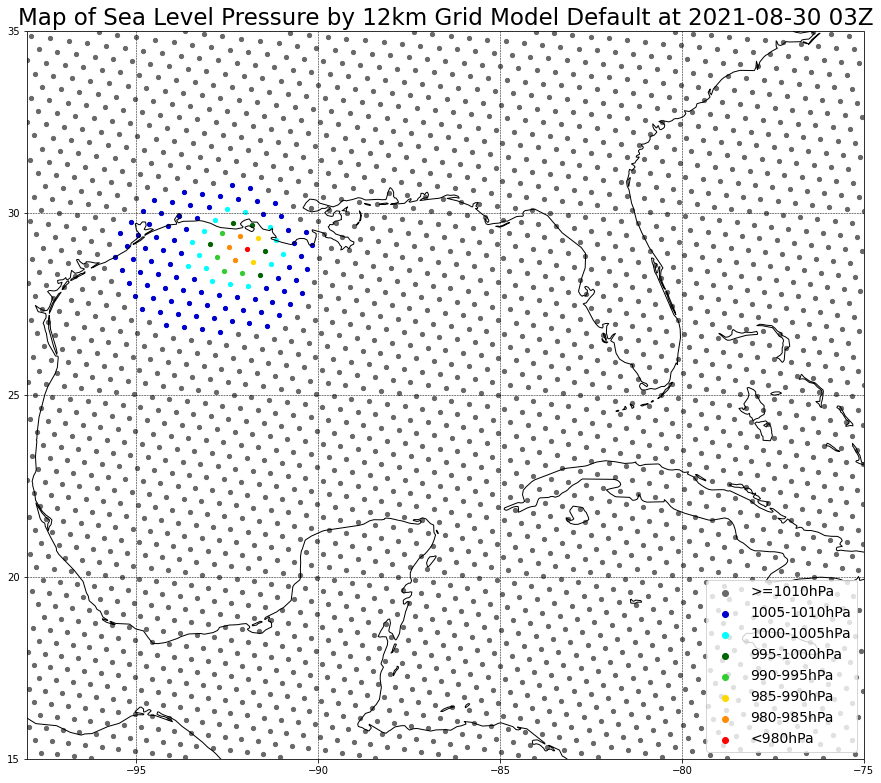

In [33]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
        Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Sfc_Pressure_List = []
        Altitude_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Sfc_Pressure_List.append(Sfc_Pressure_File[k])
                Altitude_List.append(Altitude_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
        Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
        Scale_Height = 8500
        SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
#
# Create Colour List For Labelling Sea Level Pressure
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red']
        Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', '985-990hPa', \
        '980-985hPa', '<980hPa']
        for j in range(len(SLP_NATL)):
            if SLP_NATL[j] >= 1010:
                Colour_List.append(Colours[0])
            elif SLP_NATL[j] >= 1005:
                Colour_List.append(Colours[1])
            elif SLP_NATL[j] >= 1000:
                Colour_List.append(Colours[2])
            elif SLP_NATL[j] >= 995:
                Colour_List.append(Colours[3])
            elif SLP_NATL[j] >= 990:
                Colour_List.append(Colours[4])
            elif SLP_NATL[j] >= 985:
                Colour_List.append(Colours[5])
            elif SLP_NATL[j] >= 980:
                Colour_List.append(Colours[6])
            else:
                Colour_List.append(Colours[7])
#
# Plot Sea Level Pressure Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(SLP_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Sea Level Pressure by 12km Grid Model Default at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q2_SLP_Map.png', bbox_inches='tight')

71.60007
-91.64569091796875
29.30843


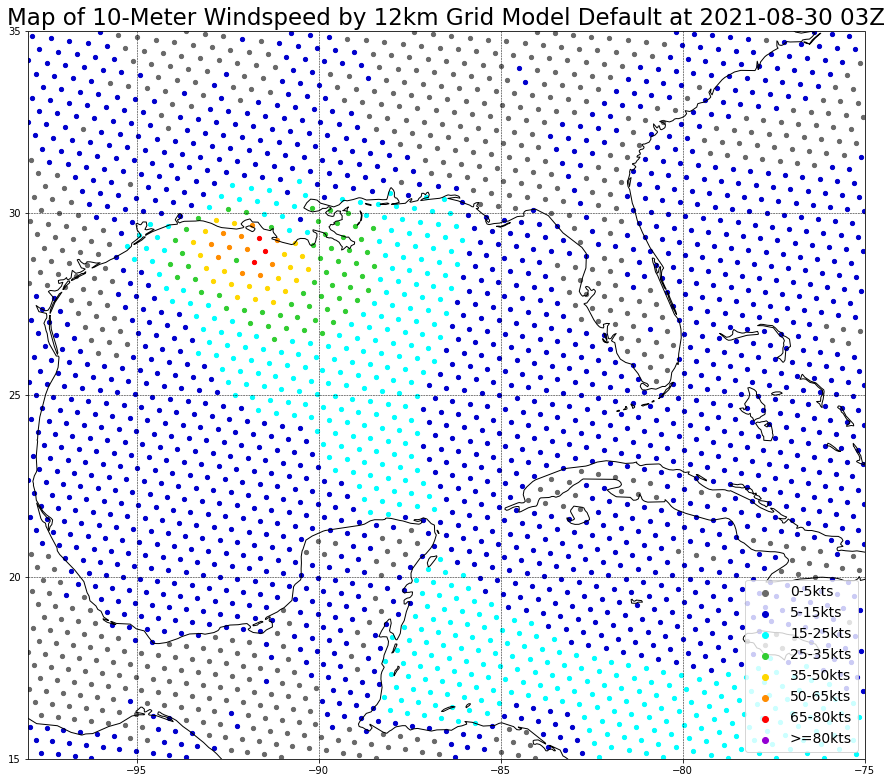

In [37]:
# Open Longitude, Latitude, U10 and V10 Files For Each Time Step
Strong_Wind_Count = 0
Gale_Wind_Count = 0
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        U10_File = numpy.array(File.u10[0]) * 3.6 / 1.852
        V10_File = numpy.array(File.v10[0]) * 3.6 / 1.852
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        U10_List = []
        V10_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                U10_List.append(U10_File[k])
                V10_List.append(V10_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Windspeed_NATL = numpy.sqrt(numpy.array(U10_List) **2 + numpy.array(V10_List) **2)
        Max_Wind_Index = numpy.argmax(Windspeed_NATL)
        print (Windspeed_NATL[Max_Wind_Index])
        print (Longitude_NATL[Max_Wind_Index] - 360)
        print (Latitude_NATL[Max_Wind_Index])
#
# Create Colour List For Labelling Windspeed
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'limegreen', 'gold', 'darkorange', 'red', 'darkviolet']
        Colour_Labels = ['0-5kts', '5-15kts', '15-25kts', '25-35kts', '35-50kts', '50-65kts', '65-80kts', '>=80kts']
        for j in range(len(Windspeed_NATL)):
            if Windspeed_NATL[j] < 5:
                Colour_List.append(Colours[0])
            elif Windspeed_NATL[j] < 15:
                Colour_List.append(Colours[1])
            elif Windspeed_NATL[j] < 25:
                Colour_List.append(Colours[2])
            elif Windspeed_NATL[j] < 35:
                Colour_List.append(Colours[3])
            elif Windspeed_NATL[j] < 50:
                Colour_List.append(Colours[4])
            elif Windspeed_NATL[j] < 65:
                Colour_List.append(Colours[5])
            elif Windspeed_NATL[j] < 80:
                Colour_List.append(Colours[6])
            else:
                Colour_List.append(Colours[7])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Windspeed_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of 10-Meter Windspeed by 12km Grid Model Default at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q2_Windspeed_Map.png', bbox_inches='tight')

In [38]:
# Find Number of Grid Cells with Strong Wind and Gale Wind
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        U10_File = numpy.array(File.u10[0]) * 3.6 / 1.852
        V10_File = numpy.array(File.v10[0]) * 3.6 / 1.852
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        U10_List = []
        V10_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                U10_List.append(U10_File[k])
                V10_List.append(V10_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Windspeed_NATL = numpy.sqrt(numpy.array(U10_List) **2 + numpy.array(V10_List) **2)
#
# Find Number of Grid Cells with Strong or Gale Wind
        Strong_Wind_Count = 0
        Gale_Wind_Count = 0
        for j in range(len(Windspeed_NATL)):
            if Windspeed_NATL[j] >= 22:
                Strong_Wind_Count += 1
            if Windspeed_NATL[j] >= 34:
                Gale_Wind_Count += 1
        print (Strong_Wind_Count)
        print (Gale_Wind_Count)
#
# Estimate Distance Between Each Grid Point
Grid_Dist = numpy.sqrt(216**2 + 556**2) / 13.5
print (Grid_Dist)
#
# Calculate Area of Each Hexagonal Grid Area
Hexagon_Area = (Grid_Dist ** 2 * numpy.sqrt(3) / 4) / 4 * 6
#
# Calculate Total Area of Strong Wind and Gale Wind
Strong_Wind_Area = Hexagon_Area * Strong_Wind_Count
Gale_Wind_Area = Hexagon_Area * Gale_Wind_Count
#
# Estimate Strong Wind Radius
Strong_Wind_Radius = numpy.sqrt(Strong_Wind_Area / numpy.pi)
Gale_Wind_Radius = numpy.sqrt(Gale_Wind_Area / numpy.pi)
print ("Strong Wind Radius:", Strong_Wind_Radius, "km")
print ("Gale Wind Radius:", Gale_Wind_Radius, "km")

135
36
44.18392783284435
Strong Wind Radius: 233.42760616987292 km
Gale Wind Radius: 120.54149749879754 km


12.522858
-91.60552978515625
28.287245


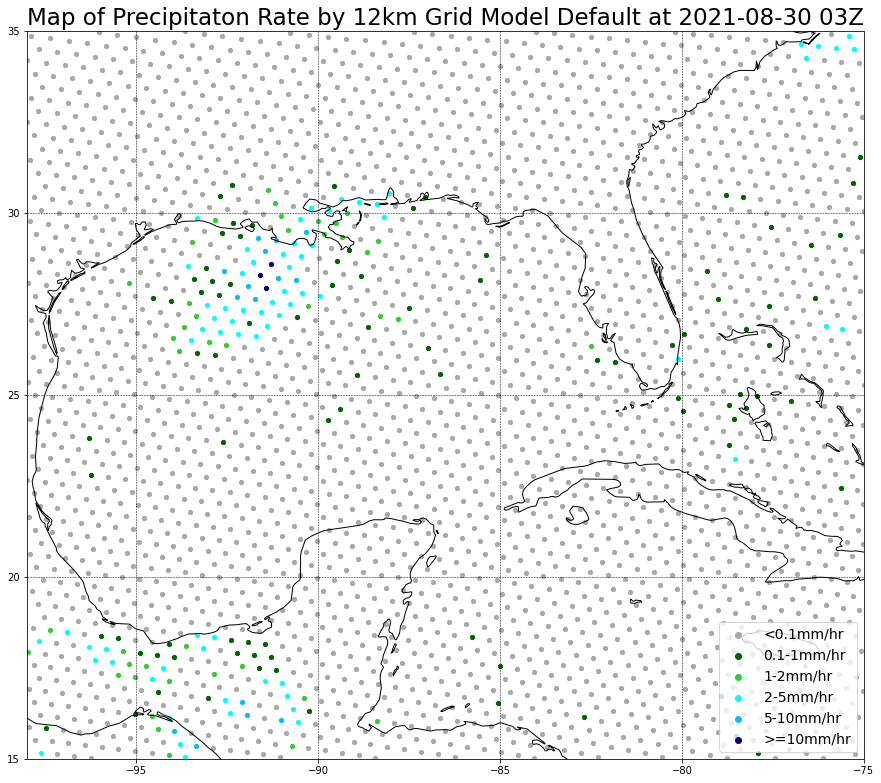

In [35]:
# Open Longitude, Latitude, Precip Rate Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        Rain_File = numpy.array(File.cuprec[0]) * 3600
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Rain_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Rain_List.append(Rain_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Rain_NATL = numpy.array(Rain_List)
        Max_Rain_Index = numpy.argmax(Rain_NATL)
        print (Rain_NATL[Max_Rain_Index])
        print (Longitude_NATL[Max_Rain_Index] - 360)
        print (Latitude_NATL[Max_Rain_Index])
#
# Create Colour List For Labelling Precip
        Colour_List = []
        Colours = ['darkgrey', 'darkgreen', 'limegreen', 'cyan', 'deepskyblue', 'navy']
        Colour_Labels = ['<0.1mm/hr', '0.1-1mm/hr', '1-2mm/hr', '2-5mm/hr', '5-10mm/hr', '>=10mm/hr']
        for j in range(len(Rain_NATL)):
            if Rain_NATL[j] < 0.1:
                Colour_List.append(Colours[0])
            elif Rain_NATL[j] < 1:
                Colour_List.append(Colours[1])
            elif Rain_NATL[j] < 2:
                Colour_List.append(Colours[2])
            elif Rain_NATL[j] < 5:
                Colour_List.append(Colours[3])
            elif Rain_NATL[j] < 10:
                Colour_List.append(Colours[4])
            else:
                Colour_List.append(Colours[5])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Rain_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Precipitaton Rate by 12km Grid Model Default at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)
Fig.savefig('Q2_Precip_Map.png', bbox_inches='tight')

[ 4.0041348e-05  7.4497213e-05  6.9882277e-05 ... -1.5390938e-06
  1.6679229e-05 -5.1049274e-06]


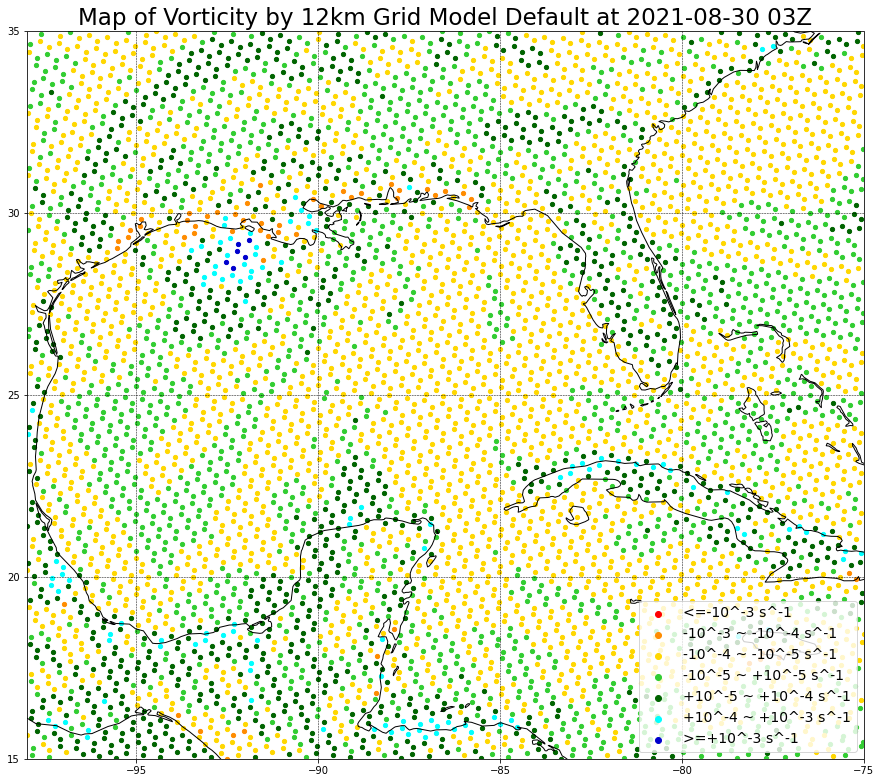

In [31]:
# Open Longitude, Latitude, Vorticity Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonVertex * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latVertex * 360 / (2*numpy.pi))
        Vorticity_File = numpy.array(File.vorticity[0,:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        Vorticity_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >= -98 and Longitude_File[k] < -75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                Vorticity_List.append(Vorticity_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        Vorticity_NATL = numpy.array(Vorticity_List)
        print (Vorticity_NATL)
#
# Create Colour List For Labelling Vorticity
        Colour_List = []
        Colours = ['red', 'darkorange', 'gold', 'limegreen', 'darkgreen', 'cyan', 'mediumblue']
        Colour_Labels = ['<=-10^-3 s^-1', '-10^-3 ~ -10^-4 s^-1', '-10^-4 ~ -10^-5 s^-1', \
        '-10^-5 ~ +10^-5 s^-1', '+10^-5 ~ +10^-4 s^-1', '+10^-4 ~ +10^-3 s^-1', '>=+10^-3 s^-1']
        for j in range(len(Vorticity_NATL)):
            if Vorticity_NATL[j] <= -10**-3:
                Colour_List.append(Colours[0])
            elif Vorticity_NATL[j] <= -10**-4:
                Colour_List.append(Colours[1])
            elif Vorticity_NATL[j] <= -10**-5:
                Colour_List.append(Colours[2])
            elif Vorticity_NATL[j] < 10**-5:
                Colour_List.append(Colours[3])
            elif Vorticity_NATL[j] < 10**-4:
                Colour_List.append(Colours[4])
            elif Vorticity_NATL[j] < 10**-3:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(Vorticity_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Vorticity by 12km Grid Model Default at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)

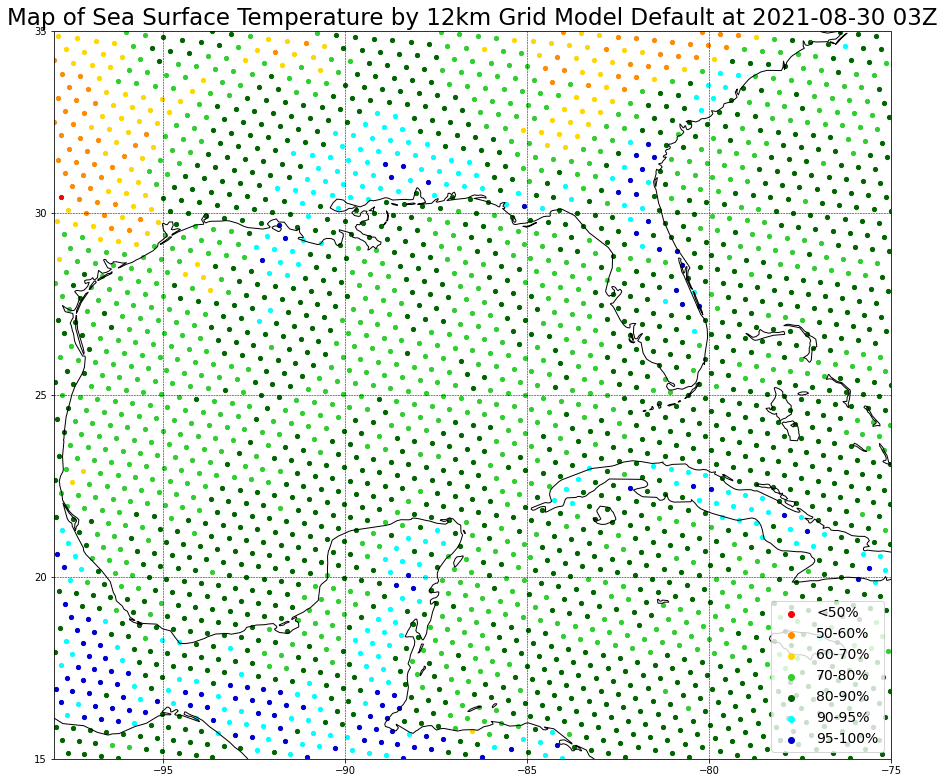

In [32]:
# Open Longitude, Latitude, Precip Rate Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        RH_File = numpy.array(File.relhum[0,:,0])
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        RH_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                RH_List.append(RH_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        RH_NATL = numpy.array(RH_List)
#
# Create Colour List For Labelling Precip
        Colour_List = []
        Colours = ['red', 'darkorange', 'gold', 'limegreen', 'darkgreen', 'cyan', 'mediumblue']
        Colour_Labels = ['<50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-95%', '95-100%']
        for j in range(len(RH_NATL)):
            if RH_NATL[j] < 50:
                Colour_List.append(Colours[0])
            elif RH_NATL[j] < 60:
                Colour_List.append(Colours[1])
            elif RH_NATL[j] < 70:
                Colour_List.append(Colours[2])
            elif RH_NATL[j] < 80:
                Colour_List.append(Colours[3])
            elif RH_NATL[j] < 90:
                Colour_List.append(Colours[4])
            elif RH_NATL[j] < 95:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(RH_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
        pyplot.title('Map of Sea Surface Temperature by 12km Grid Model Default at 2021-08-30 03Z', fontsize=23)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)

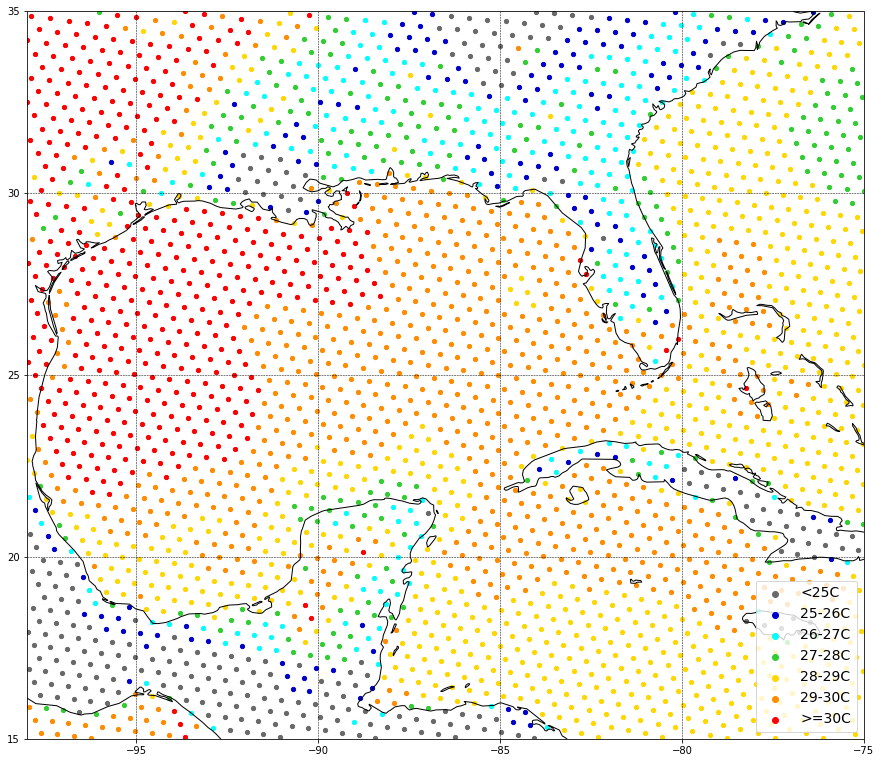

In [30]:
# Open Longitude, Latitude, SST Files For Each Time Step
for i in range(len(Time_Step_List)):
    if i == 25:
        File = xr.open_dataset(Diri + 'history.Q2.'+Time_Step_List[i] + '.nc')
        Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
        Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
        SST_File = numpy.array(File.sst[0]) - 273.15
#
# Keep Data Within Target Area
        Longitude_List = []
        Latitude_List = []
        SST_List = []
        for k in range(len(Latitude_File)):
            if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
                Longitude_List.append(Longitude_File[k])
                Latitude_List.append(Latitude_File[k])
                SST_List.append(SST_File[k])
        Longitude_NATL = numpy.array(Longitude_List)
        Latitude_NATL = numpy.array(Latitude_List)
        SST_NATL = numpy.array(SST_List)
#
# Create Colour List For Labelling SST
        Colour_List = []
        Colours = ['dimgrey', 'mediumblue', 'cyan', 'limegreen', 'gold', 'darkorange', 'red']
        Colour_Labels = ['<25C', '25-26C', '26-27C', '27-28C', '28-29C', '29-30C', '>=30C']
        for j in range(len(SST_NATL)):
            if SST_NATL[j] < 25:
                Colour_List.append(Colours[0])
            elif SST_NATL[j] < 26:
                Colour_List.append(Colours[1])
            elif SST_NATL[j] < 27:
                Colour_List.append(Colours[2])
            elif SST_NATL[j] < 28:
                Colour_List.append(Colours[3])
            elif SST_NATL[j] < 29:
                Colour_List.append(Colours[4])
            elif SST_NATL[j] < 30:
                Colour_List.append(Colours[5])
            else:
                Colour_List.append(Colours[6])
#
# Plot Windspeed Map
        Fig = pyplot.figure(figsize=(15,15))
        Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
        Axis.coastlines()
        for j in range(len(SST_NATL)):
            pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=18)
#
# Add Gridlines
        pyplot.xlim(-98,-75)
        pyplot.ylim(15,35)
        x_Axis = numpy.arange(-95,-70,5)
        y_Axis = numpy.arange(15,40,5)
        Axis.set_xticks(x_Axis)
        Axis.set_yticks(y_Axis)
        Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
        Gridline.xlocator = mticker.FixedLocator(x_Axis)
        Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Legend
        for j in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[j], label=Colour_Labels[j])
        pyplot.legend(loc=4, fontsize=14)